# 各种绘图实例

## 简单绘图

`plot` 函数：

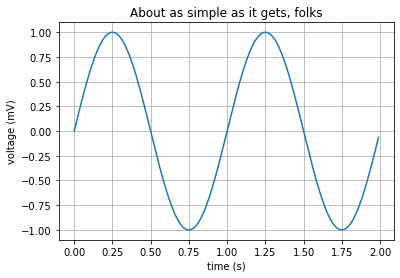

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)
plt.plot(t, s)

plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('About as simple as it gets, folks')
plt.grid(True)
plt.show()

## 子图

`subplot` 函数：

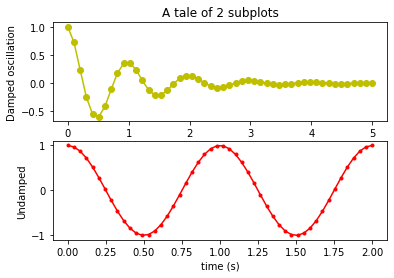

In [2]:
import numpy as np
import matplotlib.mlab as mlab

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'yo-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

## 直方图

`hist` 函数：

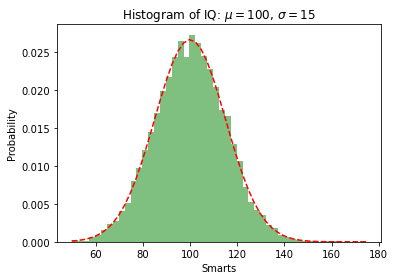

In [4]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats

# example data
mu = 100 # mean of distribution
sigma = 15 # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

num_bins = 50
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, density=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = stats.norm.pdf(bins, mu, sigma)

plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

## 三维绘图

导入 `Axex3D`：

C:\Users\Lei_Zhang\anaconda3\envs\py3_7\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


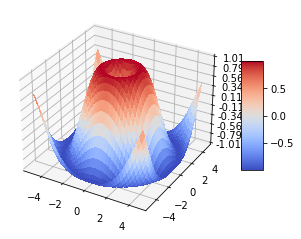

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## 条状图

`bar` 函数：

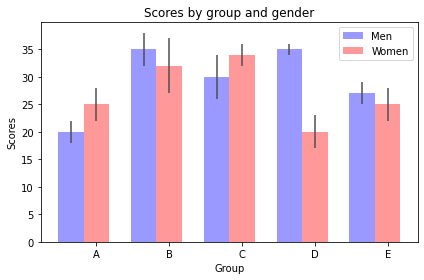

In [13]:
import numpy as np
import matplotlib.pyplot as plt


n_groups = 5

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=std_men,
                 error_kw=error_config,
                 label='Men')

rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='r',
                 yerr=std_women,
                 error_kw=error_config,
                 label='Women')

plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D', 'E'))
plt.legend()

plt.tight_layout()
plt.show()

## 饼状图

`pie` 函数：

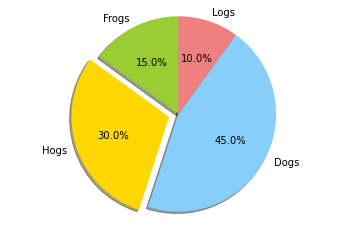

In [9]:
import matplotlib.pyplot as plt


# The slices will be ordered and plotted counter-clockwise.
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.show()

## 填充曲线

`fill` 函数：

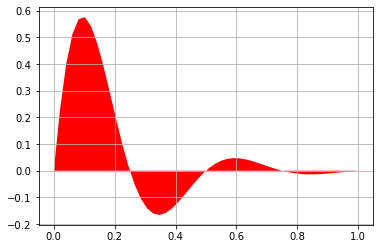

In [8]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 1)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

plt.fill(x, y, 'r')
plt.grid(True)
plt.show()

## 对数图

`loglog, semilogx, semilogy, errorbar` 函数：

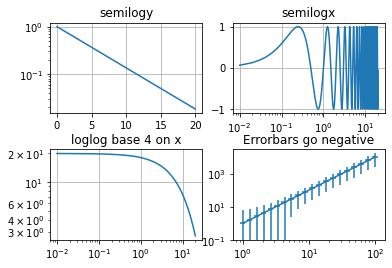

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.subplots_adjust(hspace=0.4)
t = np.arange(0.01, 20.0, 0.01)

# log y axis
plt.subplot(221)
plt.semilogy(t, np.exp(-t/5.0))
plt.title('semilogy')
plt.grid(True)

# log x axis
plt.subplot(222)
plt.semilogx(t, np.sin(2*np.pi*t))
plt.title('semilogx')
plt.grid(True)

# log x and y axis
plt.subplot(223)
plt.loglog(t, 20*np.exp(-t/10.0))
plt.grid(True)
plt.title('loglog base 4 on x')

# with errorbars: clip non-positive values
ax = plt.subplot(224)
ax.set_xscale("log")
ax.set_yscale("log")

x = 10.0**np.linspace(0.0, 2.0, 20)
y = x**2.0
plt.errorbar(x, y, xerr=0.1*x, yerr=5.0+0.75*y)
ax.set_ylim(ymin=0.1)
ax.set_title('Errorbars go negative')


plt.show()

## 极坐标

设置 `polar=True`：

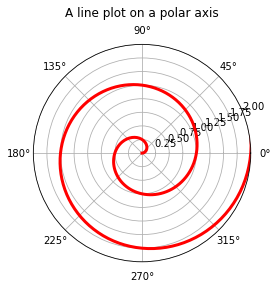

In [3]:
import numpy as np
import matplotlib.pyplot as plt


r = np.arange(0, 3.0, 0.01)
theta = 2 * np.pi * r

ax = plt.subplot(111, polar=True)
ax.plot(theta, r, color='r', linewidth=3)
ax.set_rmax(2.0)
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

## 标注

`legend` 函数：

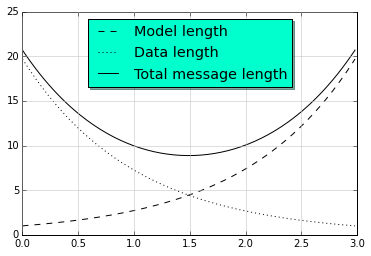

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Make some fake data.
a = b = np.arange(0,3, .02)
c = np.exp(a)
d = c[::-1]

# Create plots with pre-defined labels.
plt.plot(a, c, 'k--', label='Model length')
plt.plot(a, d, 'k:', label='Data length')
plt.plot(a, c+d, 'k', label='Total message length')

legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#00FFCC')

plt.show()